# **Medical Image DataSet: Brain Tumor Detection**

In [ ]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [ ]:
# Check GPU Device
import torch
print("CUDA Available:", torch.cuda.is_available())  # Should return True
print("GPU Count:", torch.cuda.device_count())
print("Current Device:", torch.cuda.current_device() if torch.cuda.is_available() else "No GPU detected")


CUDA Available: True
GPU Count: 1
Current Device: 0


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from ultralytics import YOLO
import shutil


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import gdown
import zipfile
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the Dataset**

In [ ]:
# Correct Google Drive File ID
FILE_ID = "13M2FyjtVPPv15WV3zY7B9VMTeaUbkCbS"
DATASET_ZIP = "/content/archive.zip"
EXTRACT_PATH = "/content/drive/MyDrive/TumorDataset"

# Use the correct Google Drive link format
DOWNLOAD_URL = f"https://drive.google.com/uc?id={FILE_ID}"

if not os.path.exists(EXTRACT_PATH):
    print("Downloading dataset...")
    gdown.download(DOWNLOAD_URL, DATASET_ZIP, quiet=False)

    # Check if file is a valid ZIP before extraction
    if zipfile.is_zipfile(DATASET_ZIP):
        print("Extracting dataset...")
        with zipfile.ZipFile(DATASET_ZIP, 'r') as zip_ref:
            zip_ref.extractall('/content/')  # or use (EXTRACT_PATH) to Extract directly to Google Drive
    else:
        print("Error: Downloaded file is not a valid ZIP. Check the link and permissions.")
else:
    print("Dataset already exists in Google Drive.")

Downloading...
From (original): https://drive.google.com/uc?id=13M2FyjtVPPv15WV3zY7B9VMTeaUbkCbS
From (redirected): https://drive.google.com/uc?id=13M2FyjtVPPv15WV3zY7B9VMTeaUbkCbS&confirm=t&uuid=627d378f-158a-4eb0-ae64-5ee7c035662f
To: /content/archive.zip
100%|██████████| 311M/311M [00:04<00:00, 63.8MB/s]


Extracting dataset...


## **Load the YOLO V8**

In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 140MB/s]


In [ ]:
# Define the dataset_path
yaml_file_path = '/content/BrainTumor/BrainTumorYolov8/data.yaml'

In [ ]:
%%time
# Train the model on our custom dataset
results = T_Model.train(data=yaml_file_path, epochs=50, patience=20, batch= -1, optimizer='auto')

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/BrainTumor/BrainTumorYolov8/data.yaml, epochs=50, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 68.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 310MB/s]


AMP: checks passed ✅


train: Scanning /content/BrainTumor/BrainTumorYolov8/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:01<00:00, 1994.23it/s]


train: New cache created: /content/BrainTumor/BrainTumorYolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.382         40.42         260.9        (1, 3, 640, 640)                    list
     3011433       16.39

train: Scanning /content/BrainTumor/BrainTumorYolov8/train/labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 1186.01it/s]


val: New cache created: /content/BrainTumor/BrainTumorYolov8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00084375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      12.5G      1.377      4.319      1.471        150        640: 100%|██████████| 20/20 [00:43<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.58s/it]

                   all        612        612   0.000889      0.287      0.071     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.4G      1.223      2.922      1.286        158        640: 100%|██████████| 20/20 [00:33<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.13s/it]


                   all        612        612      0.841     0.0662      0.293      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.4G      1.162      2.348       1.25        123        640: 100%|██████████| 20/20 [00:31<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]

                   all        612        612      0.973      0.102      0.347      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.4G      1.186      2.059      1.288        149        640: 100%|██████████| 20/20 [00:31<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.04s/it]


                   all        612        612      0.384      0.271      0.266      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.4G      1.206      1.927      1.286        153        640: 100%|██████████| 20/20 [00:32<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.44s/it]


                   all        612        612      0.313      0.138      0.112     0.0477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.4G       1.19      1.702      1.274        139        640: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.84s/it]


                   all        612        612      0.273      0.226      0.191      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.4G       1.19      1.613      1.291        156        640: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]


                   all        612        612      0.589      0.244      0.236      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.4G      1.148      1.393      1.261        131        640: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.82s/it]

                   all        612        612       0.39      0.329      0.302      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.4G      1.124      1.334      1.251        154        640: 100%|██████████| 20/20 [00:31<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]

                   all        612        612      0.574      0.488      0.489      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.4G        1.1      1.244      1.223        154        640: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.04s/it]

                   all        612        612      0.513      0.515      0.489      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.4G      1.105      1.204      1.235        161        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.79s/it]

                   all        612        612      0.568      0.531      0.522      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.4G      1.089      1.177       1.22        135        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.83s/it]

                   all        612        612        0.7      0.528      0.609      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.4G      1.045      1.061      1.192        161        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]

                   all        612        612       0.69      0.572      0.628      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.4G      1.061      1.057      1.193        150        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.12s/it]

                   all        612        612      0.745      0.616      0.704      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.4G      1.025      0.994      1.177        142        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]

                   all        612        612      0.772      0.624      0.704      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.4G     0.9964     0.9877      1.169        132        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]


                   all        612        612      0.758      0.625      0.706       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.4G      1.006     0.9704       1.17        145        640: 100%|██████████| 20/20 [00:31<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.94s/it]

                   all        612        612      0.694       0.61      0.681      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.4G      0.982     0.9456      1.157        139        640: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.91s/it]

                   all        612        612      0.745      0.652      0.716      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.4G      1.003     0.9415      1.178        157        640: 100%|██████████| 20/20 [00:30<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]

                   all        612        612      0.837      0.753      0.843      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.4G     0.9707      0.899       1.15        141        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.39s/it]

                   all        612        612      0.792      0.694       0.76      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.4G     0.9773     0.8792      1.151        140        640: 100%|██████████| 20/20 [00:30<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.28s/it]

                   all        612        612      0.781      0.641      0.764      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.4G     0.9441     0.8622      1.144        158        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.97s/it]

                   all        612        612      0.801      0.769       0.84      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.4G     0.9572     0.8296      1.133        154        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]

                   all        612        612      0.795      0.744       0.83      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.4G     0.9268     0.7982      1.117        127        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]

                   all        612        612      0.645      0.615      0.651      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.4G     0.9562     0.8051      1.135        145        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.98s/it]

                   all        612        612      0.845      0.723      0.823      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.4G     0.9034     0.7964      1.115        147        640: 100%|██████████| 20/20 [00:30<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]

                   all        612        612       0.79      0.737      0.816      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.4G     0.9003     0.7714       1.11        151        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.49s/it]

                   all        612        612      0.798      0.794      0.845      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.4G     0.9138     0.7681      1.113        139        640: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.65s/it]

                   all        612        612      0.836      0.791      0.865      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.4G     0.8981     0.7236      1.097        152        640: 100%|██████████| 20/20 [00:32<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.64s/it]

                   all        612        612      0.877      0.832      0.885      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.4G     0.9032     0.7284      1.111        125        640: 100%|██████████| 20/20 [00:32<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]

                   all        612        612      0.838      0.802      0.845      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.4G     0.8668     0.7016      1.093        148        640: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]

                   all        612        612      0.859      0.818      0.896      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.4G      0.863     0.6862      1.086        135        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]

                   all        612        612      0.861       0.82      0.891      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.4G     0.8494     0.6737      1.076        144        640: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]

                   all        612        612      0.788      0.807      0.849      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.4G     0.8509     0.6534      1.079        144        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.93s/it]

                   all        612        612      0.827      0.854      0.889      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.4G      0.828     0.6371      1.067        157        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.88s/it]

                   all        612        612       0.78      0.758      0.803      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.4G     0.8371     0.6555      1.074        144        640: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.90s/it]

                   all        612        612      0.883      0.794      0.871      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.4G     0.8097     0.6043      1.055        156        640: 100%|██████████| 20/20 [00:30<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.23s/it]

                   all        612        612      0.913      0.812      0.888      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.4G     0.8085     0.6179      1.051        132        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.92s/it]

                   all        612        612      0.863      0.852      0.891      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.4G     0.8053     0.6144       1.05        160        640: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.89s/it]

                   all        612        612      0.878      0.828      0.889      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.4G     0.7942     0.6026       1.04        159        640: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.93s/it]

                   all        612        612      0.895      0.827      0.893      0.682


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.4G     0.7179     0.5462     0.9908         91        640: 100%|██████████| 20/20 [00:40<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.99s/it]

                   all        612        612      0.874      0.837       0.89      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.4G     0.6859     0.4637      0.977         92        640: 100%|██████████| 20/20 [00:27<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.07s/it]

                   all        612        612      0.871      0.833      0.886      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.4G     0.6698     0.4451      0.966         92        640: 100%|██████████| 20/20 [00:29<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.62s/it]

                   all        612        612      0.901      0.869      0.917      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.4G     0.6506     0.4197     0.9538         92        640: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.48s/it]

                   all        612        612      0.888      0.889      0.926      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      12.4G     0.6438     0.4133     0.9469         92        640: 100%|██████████| 20/20 [00:30<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.44s/it]

                   all        612        612      0.883      0.883      0.925       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.4G       0.64     0.3904     0.9467         90        640: 100%|██████████| 20/20 [00:29<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.29s/it]

                   all        612        612        0.9      0.874      0.918      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.4G     0.6263     0.3877     0.9364         92        640: 100%|██████████| 20/20 [00:30<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.53s/it]

                   all        612        612      0.893      0.879       0.92      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.4G     0.6204     0.3838     0.9355         91        640: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.77s/it]

                   all        612        612      0.914       0.87      0.928      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      12.4G     0.5955     0.3687     0.9199         92        640: 100%|██████████| 20/20 [00:29<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.48s/it]

                   all        612        612      0.909      0.878       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.4G     0.6011     0.3637     0.9264         92        640: 100%|██████████| 20/20 [00:28<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.40s/it]

                   all        612        612      0.903      0.885       0.93      0.717



50 epochs completed in 0.583 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.26s/it]


In [ ]:
# Load the best model with a more flexible and reusable script
post_training_files_path = '/content/runs/detect/train/'  # Adjust if needed,
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best Model weights
best_model = YOLO(best_model_path)

In [ ]:
%%time
# Validate the best model
metrics = best_model.val(split='val')


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/BrainTumor/BrainTumorYolov8/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.17it/s]


                   all        612        612      0.912      0.877       0.93      0.719
                glioma        285        285       0.85      0.755      0.843      0.558
            meningioma        142        142      0.977      0.951      0.982      0.834
             pituitary        185        185      0.907      0.924      0.965      0.765
Speed: 1.5ms preprocess, 4.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
CPU times: user 11.1 s, sys: 2.69 s, total: 13.8 s
Wall time: 15.2 s


In [ ]:
print(metrics.results_dict.keys())


dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [ ]:
# Print the extracted metrics
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")  # Precision
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")  # Recall
print(f"mAP@50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")  # Mean Average Precision at 50% IoU
print(f"mAP@50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")  # Mean Average Precision at 50-95% IoU
print(f"Fitness Score: {metrics.results_dict['fitness']:.4f}")  # Fitness score

# Store in a dictionary
results_dict = {
    "mAP@50": metrics.results_dict["metrics/mAP50(B)"],
    "mAP@50-95": metrics.results_dict["metrics/mAP50-95(B)"],
    "Precision": metrics.results_dict['metrics/precision(B)'],
    "Recall": metrics.results_dict['metrics/recall(B)'],
    "Fitness Score": metrics.results_dict['fitness']
}


Precision: 0.9116
Recall: 0.8767
mAP@50: 0.9299
mAP@50-95: 0.7193
Fitness Score: 0.7403


In [ ]:
# Print All Metrics at Once
print(metrics)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb855f5e610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Convert dictionary to DataFrame
metrics_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Metric Value'])
metrics_df

Metric Value
mAP@50             0.929944
mAP@50-95          0.719259
Precision          0.911599
Recall             0.876725
Fitness Score      0.740327

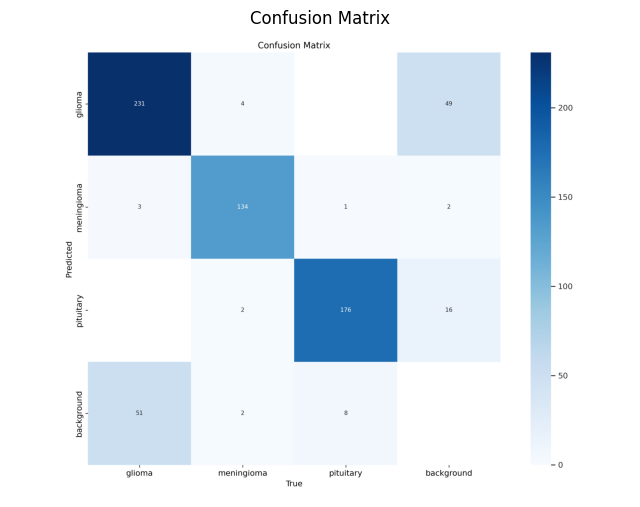

In [ ]:
# Load and display the confusion matrix
conf_matrix_path = "/content/runs/detect/val/confusion_matrix.png"
img = cv2.imread(conf_matrix_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

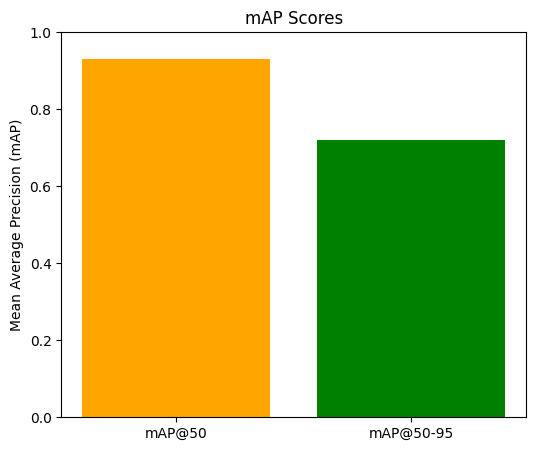

In [ ]:
# Plot mAP Curves Manually
# Extract values
mAP50 = metrics.results_dict["metrics/mAP50(B)"]
mAP50_95 = metrics.results_dict["metrics/mAP50-95(B)"]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(["mAP@50", "mAP@50-95"], [mAP50, mAP50_95], color=["orange", "green"])
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores")
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1
plt.show()


❌ Error: File not found - results.png


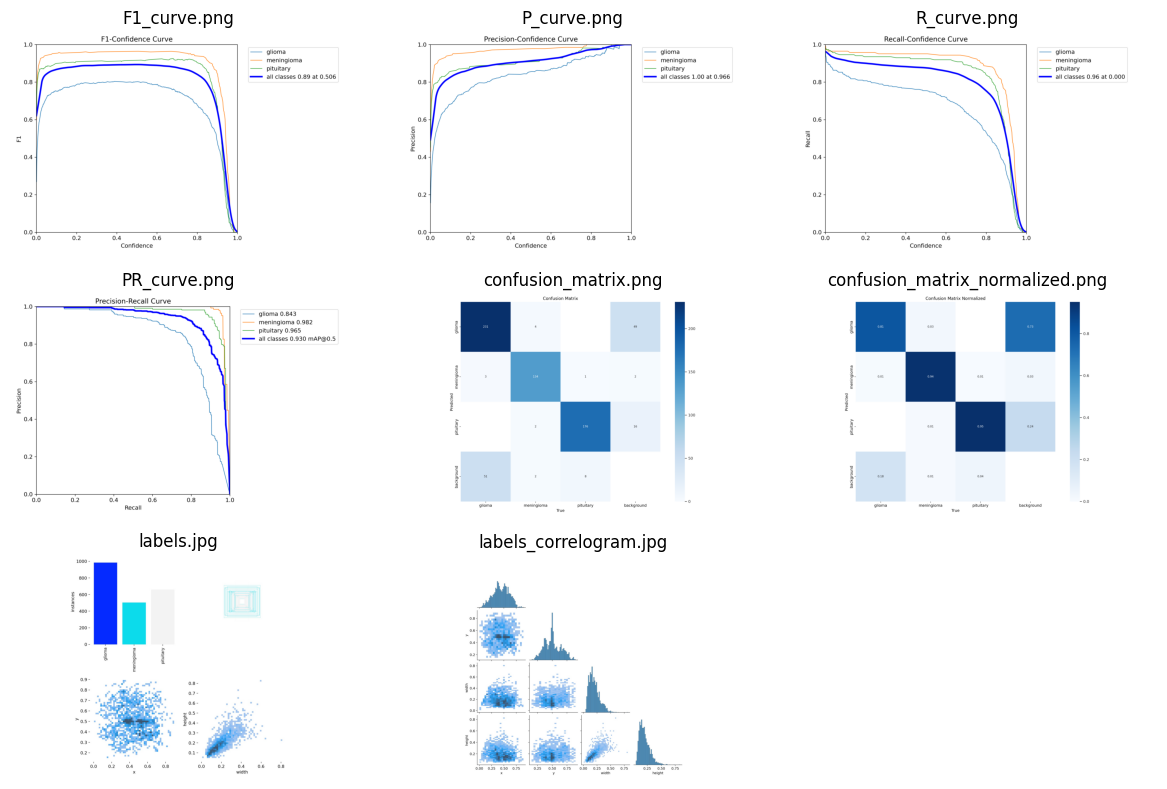

In [ ]:
def find_image_path(image_name, folders):
    """Finds the correct path for an image by checking multiple folders."""
    for folder in folders:
        img_path = os.path.join(folder, image_name)
        if os.path.exists(img_path):
            return img_path
    return None

def plot_images(image_files, folder_paths, rows=3, cols=3, figsize=(12, 8)):
    """Displays multiple images in a grid layout, checking multiple directories."""
    num_images = len(image_files)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multi-dimensional grid

    for i, img_name in enumerate(image_files):
        if i < len(axes):  # Avoid errors if there are more subplots than images
            img_path = find_image_path(img_name, folder_paths)  # Full paths

            if img_path is None:  # Check if the file exists
                print(f"❌ Error: File not found - {img_name}")
                axes[i].axis('off')  # Hide the subplot
                continue

            img = cv2.imread(img_path)
            if img is None:  # Check if the image was loaded correctly
                print(f"❌ Error: Unable to read image - {img_path}")
                axes[i].axis('off')  # Hide the subplot
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[i].imshow(img)
            axes[i].set_title(img_name.split('.')[0])  # Use filename as title
            axes[i].axis('off')
    # Remove any extra empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Define possible image locations
folder_paths = ["/content/runs/detect/train/", "/content/runs/detect/val/"]  # Path to the folder containing images

# List of images to display
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'labels.jpg',
    'labels_correlogram.jpg',
    # 'results.png',
]

# Call the function with multiple folder paths
plot_images(image_files, folder_paths, rows=3, cols=3)


In [ ]:
%%time
# Run inference on the Test Set or Unseen data
test_results_1 = best_model.predict(source="/content/BrainTumor/BrainTumorYolov8/test/images/", save=True, conf=0.25)


image 1/308 /content/BrainTumor/BrainTumorYolov8/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 640x640 1 pituitary, 7.5ms
image 2/308 /content/BrainTumor/BrainTumorYolov8/test/images/1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg: 640x640 1 pituitary, 7.5ms
image 3/308 /content/BrainTumor/BrainTumorYolov8/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 7.5ms
image 4/308 /content/BrainTumor/BrainTumorYolov8/test/images/102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg: 640x640 1 meningioma, 7.4ms
image 5/308 /content/BrainTumor/BrainTumorYolov8/test/images/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg: 640x640 1 pituitary, 7.5ms
image 6/308 /content/BrainTumor/BrainTumorYolov8/test/images/1037_jpg.rf.7c415f051556bbba83bc00f70fe54818.jpg: 640x640 1 pituitary, 7.4ms
image 7/308 /content/BrainTumor/BrainTumorYolov8/test/images/1041_jpg.rf.252e75e8f025b79f801db895122613d3.jpg: 640x640 1 meningioma, 1 pituitary, 7.5ms
image 8/308 /conten

In [ ]:
# List to store extracted results
results = []

# Loop through YOLOv8 results
for result in test_results_1:
    image_name = result.path  # Get image path
    detections = result.names if result.boxes else "no detections"  # Check if detections exist

    # Append results as dictionary
    results.append({"Image": image_name.split("/")[-1], "Detection": detections})

# Convert to Pandas DataFrame
df = pd.DataFrame(results)

# Display results
df

Image  \
0    1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg   
1    1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg   
2    1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg   
3     102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg   
4    1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg   
..                                                ...   
303   937_jpg.rf.f1aeff71adf047fc3774da3706a9c18d.jpg   
304   940_jpg.rf.b20d2f1451241d70bbbc6f6599180f2e.jpg   
305   956_jpg.rf.98844fd6cb49702609e2f9414dc68649.jpg   
306   964_jpg.rf.7ce0bb422c279b80d38fbe1b4d46dabf.jpg   
307   979_jpg.rf.8fad468a4755ad718f4a8b8b6893535c.jpg   

                                          Detection  
0    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
1    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
2    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
3    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
4    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
..                                              ...  
303  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
304  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
305  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
306  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
307  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  

[308 rows x 2 columns]

In [ ]:
%%time
# Evaluate the Model on the Test Set
test_metrics_1 = best_model.val(data="/content/BrainTumor/BrainTumorYolov8/data.yaml", split="test")


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/BrainTumor/BrainTumorYolov8/test/labels... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<00:00, 1652.89it/s]

val: New cache created: /content/BrainTumor/BrainTumorYolov8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


                   all        308        308      0.877      0.848      0.905      0.698
                glioma        159        159      0.773      0.685       0.76      0.517
            meningioma         62         62      0.903      0.952      0.977      0.834
             pituitary         87         87      0.954      0.908      0.976      0.743
Speed: 1.8ms preprocess, 4.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
CPU times: user 7.36 s, sys: 2.2 s, total: 9.56 s
Wall time: 7.43 s



0: 640x640 1 glioma, 11.6ms
Speed: 4.4ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.6ms
Speed: 2.5ms preprocess, 7.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 7.5ms
Speed: 2.7ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 7.5ms
Speed: 2.8ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 3.1ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 meningioma, 13.7ms
Speed: 4.7ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 7.7ms
Speed: 2.7ms preprocess, 7.7ms inference, 1.2ms postprocess per image at sha

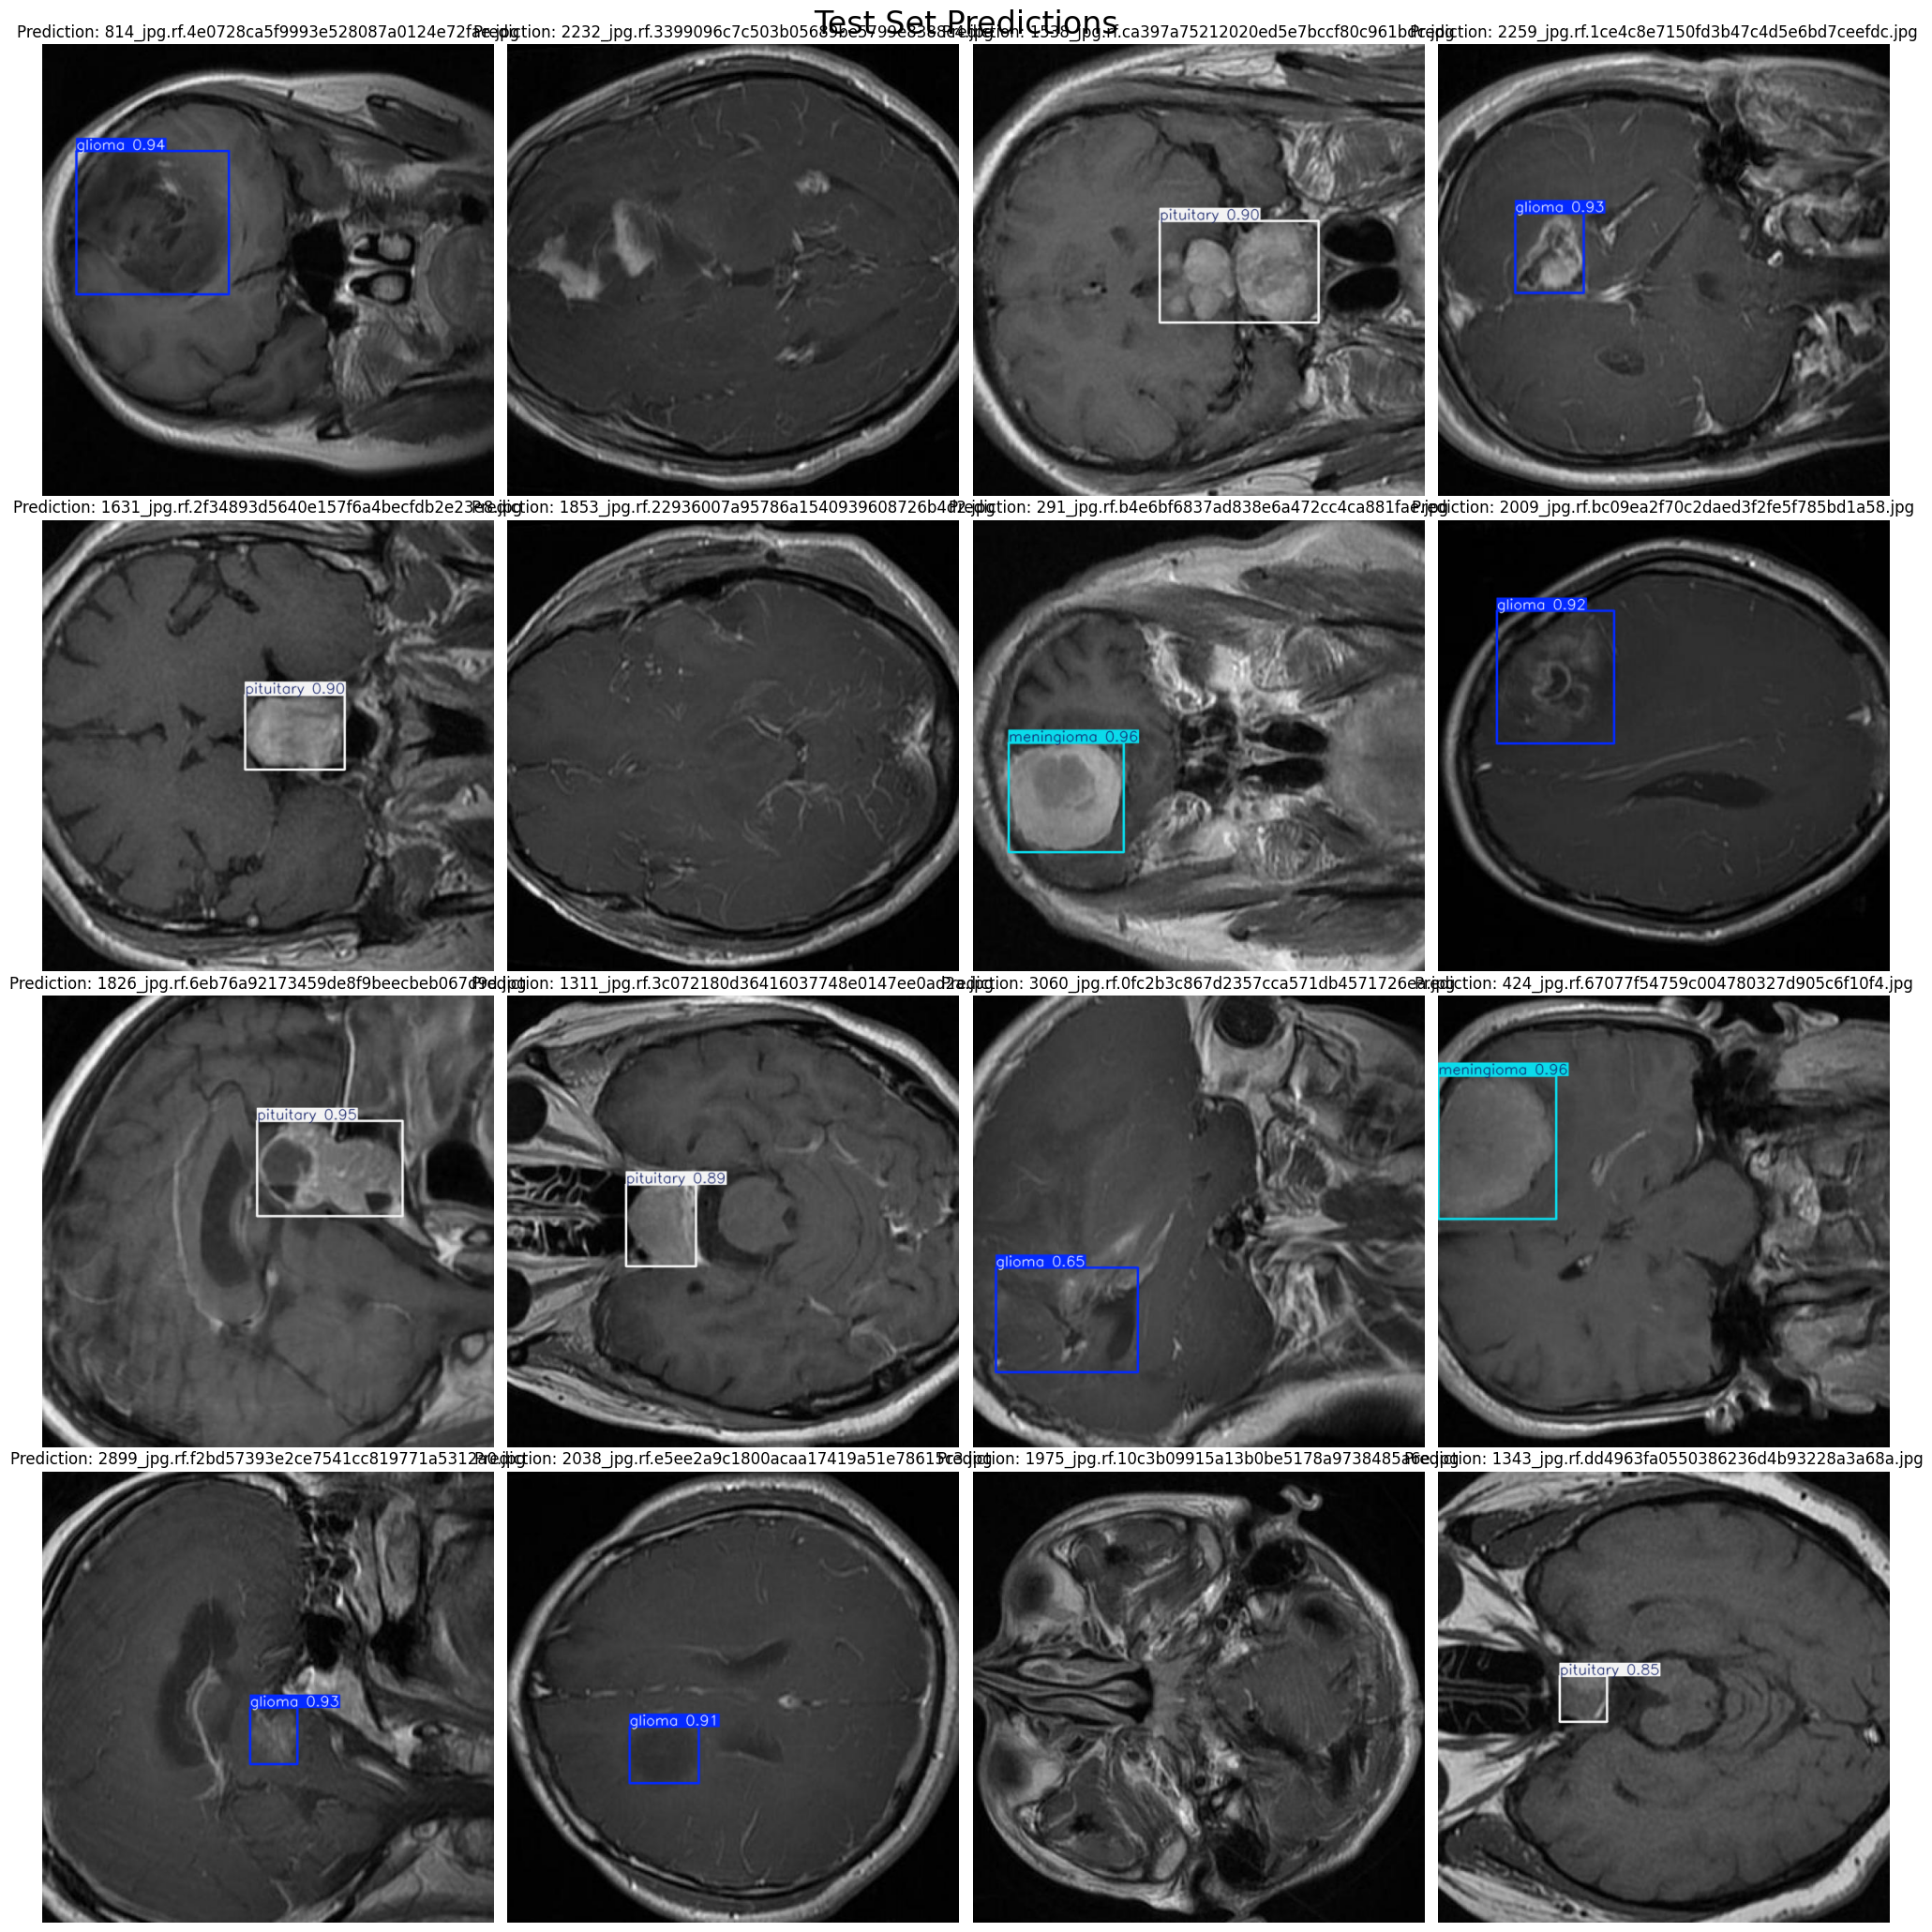

In [ ]:
# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)

# Path to test images
dataset_path = "/content/BrainTumor/BrainTumorYolov8"
test_images_path = os.path.join(dataset_path, "test", "images")

# List all test images
image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]

# Ensure there are images
if len(image_files) > 0:
    # Select up to 16 evenly spaced images for visualization
    num_images = min(len(image_files), 16)
    step_size = max(1, len(image_files) // num_images)
    selected_images = [image_files[i] for i in range(0, len(image_files), step_size)][:16]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle("Test Set Predictions", fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(test_images_path, selected_images[i])

            # Load and resize image
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is None:
                print(f"Warning: Failed to load {image_path}")
                continue

            resized_image = resize_image(image, size=(640, 640))

            # Run inference with YOLOv8
            results = best_model.predict(source=resized_image, imgsz=640, conf=0.5)

            # Annotate and display image
            annotated_image = results[0].plot(line_width=2)
            ax.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            ax.set_title(f"Prediction: {selected_images[i]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("No test images found!")

In [ ]:
# Define paths
source_path = "/content/runs/detect/train/weights/best.pt"
destination_path = "/content/BrainTumor/BrainTumorYolov8/best_model.pt"  # Change to your preferred location

# Copy the model
shutil.copy(source_path, destination_path)
print(f"Best model saved at: {destination_path}")


Best model saved at: /content/BrainTumor/BrainTumorYolov8/best_model.pt


In [ ]:
# Export as TorchScript
best_model.export(format="torchscript")

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 2.3s, saved as '/content/runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (4.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640 data=/content/BrainTumor/BrainTumorYolov8/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.torchscript'

In [ ]:
!pip install nvidia-tensorrt

# Export as TensorRT (Optimized for NVIDIA)
best_model.export(format="engine")  # Needs GPU


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.6 MB/s eta 0:00:00
  Created wheel for tensorrt: filename=tensorrt-10.9.0.34-py2.py3-none-any.whl size=46629 sha256=84a4c3f092cad5247d321c2641d4945e122502795eb94f19d8812dd8192d72d4
  Stored in directory: /root/.cache/pip/wheels/3a/4d/72/f28cb367f1435d026243047d4f60fde8f1c9cbb06a204f842f
  Created wheel for tensorrt_cu12: filename=tensorrt_cu12-10.9.0.34-py2.py3-none-any.whl size=17465 sha256=0c13887c2e2bd821e6254545d497726a1e2ceb2e6d96c691d8d90980367a19eb
  Stored in directory: /root/.cache/pip/wheels/75/09/76/6b405075fe4c04097f5713ec0a688df7892aaee823bc141952
  Created wheel for tensorrt_cu12_libs: filename=tensorrt_cu12_libs-10.9.0.34-

'/content/runs/detect/train/weights/best.engine'

In [ ]:
# Export the ONNX model
best_model.export(format="onnx")

# Move the exported file to the desired directory
shutil.move("/content/runs/detect/train/weights/best.onnx", "/content/BrainTumor/BrainTumorYolov8/best.onnx")


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 328.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 306.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 302.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 249.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 272.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
O

'/content/BrainTumor/BrainTumorYolov8/best.onnx'

## **Load the YOLO V11**

In [ ]:
# Load a pretrained YOLOv11n model from Ultralytics
T_Model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 265MB/s]


In [ ]:
# Define the dataset_path
yaml_file_path = '/content/BrainTumor/BrainTumorYolov11/data.yaml'

In [ ]:
%%time
# Train the model on our custom dataset
results = T_Model.train(data=yaml_file_path, epochs=50, patience=20, batch=64, optimizer='auto')

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/BrainTumor/BrainTumorYolov11/data.yaml, epochs=50, time=None, patience=20, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/BrainTumor/BrainTumorYolov11/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:01<00:00, 2036.16it/s]

train: New cache created: /content/BrainTumor/BrainTumorYolov11/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/BrainTumor/BrainTumorYolov11/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 876.24it/s]


val: New cache created: /content/BrainTumor/BrainTumorYolov11/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.88G      1.373      3.996      1.468         63        640: 100%|██████████| 34/34 [00:37<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]

                   all        612        612    0.00302      0.648      0.133     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G      1.273      2.732      1.356         53        640: 100%|██████████| 34/34 [00:35<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]


                   all        612        612        0.3      0.306      0.206      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.4G      1.309      2.306       1.38         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]


                   all        612        612      0.238      0.266     0.0682     0.0403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.4G      1.325      1.978      1.386         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]

                   all        612        612      0.801      0.197      0.169      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G      1.276      1.687      1.346         52        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

                   all        612        612      0.789      0.146      0.153     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.5G       1.25      1.539      1.344         43        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


                   all        612        612      0.593      0.289      0.317      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.5G      1.214      1.436      1.323         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.69s/it]

                   all        612        612      0.503      0.386      0.387      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.5G       1.17      1.317      1.286         46        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]

                   all        612        612      0.543        0.5      0.549      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.5G      1.161       1.28      1.288         52        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all        612        612       0.47      0.603      0.526      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.5G      1.144      1.249      1.271         54        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.684      0.609      0.649      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.5G      1.149      1.224       1.27         50        640: 100%|██████████| 34/34 [00:34<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        612        612      0.686      0.567      0.609      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.5G      1.112      1.147      1.254         58        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

                   all        612        612      0.694      0.636      0.676      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.6G      1.108      1.123      1.253         45        640: 100%|██████████| 34/34 [00:34<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all        612        612      0.611       0.53      0.555      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.6G      1.101        1.1      1.248         58        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]

                   all        612        612      0.636      0.541       0.56      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.6G      1.065      1.073      1.224         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all        612        612      0.697      0.639      0.675      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.6G      1.075       1.08      1.232         42        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]

                   all        612        612      0.711       0.64       0.68      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.6G      1.036      1.028      1.201         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

                   all        612        612      0.744      0.718      0.763      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.6G      1.054     0.9778      1.214         49        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all        612        612      0.809       0.72      0.806      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.7G      1.024     0.9426      1.194         59        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612       0.75      0.707      0.767      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.7G      1.035     0.9824        1.2         44        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all        612        612      0.808      0.762      0.813      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.7G      1.016     0.9362      1.188         51        640: 100%|██████████| 34/34 [00:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        612        612      0.773      0.721      0.769      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.7G      1.002     0.9076      1.188         45        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

                   all        612        612      0.695      0.712       0.76      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.7G     0.9869     0.9063      1.169         64        640: 100%|██████████| 34/34 [00:33<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        612        612      0.749      0.683       0.76      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.7G      1.025     0.8893      1.191         57        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]

                   all        612        612      0.829      0.712      0.829      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.7G     0.9839     0.8425      1.169         47        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all        612        612      0.778      0.724      0.818      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.8G     0.9785     0.8615      1.167         48        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]

                   all        612        612      0.818      0.772      0.839      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.8G     0.9609     0.8361      1.161         47        640: 100%|██████████| 34/34 [00:34<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        612        612      0.818      0.802      0.846       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.8G     0.9607     0.8252       1.16         59        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.803      0.821      0.858       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.8G     0.9311     0.8094      1.134         40        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all        612        612      0.839      0.757      0.824       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.8G     0.9485     0.8159      1.144         58        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.80s/it]

                   all        612        612      0.847      0.832       0.89      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.8G     0.9341     0.7846      1.142         57        640: 100%|██████████| 34/34 [00:35<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]

                   all        612        612      0.783       0.83      0.849      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.8G     0.9384     0.7824      1.134         56        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.836      0.783       0.86      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.9G     0.9163     0.7651      1.117         53        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]

                   all        612        612       0.84      0.849       0.88      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.9G     0.8942     0.7295      1.111         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]

                   all        612        612      0.884       0.83      0.895      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.9G     0.9142      0.747      1.118         64        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.844      0.834      0.883      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.9G     0.9088     0.7355      1.125         51        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all        612        612      0.875      0.829      0.893      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.9G     0.8827     0.7122      1.102         54        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all        612        612      0.865      0.826      0.891      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.9G     0.8703     0.6667      1.101         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

                   all        612        612       0.87      0.861      0.905      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.9G      0.872     0.7016      1.094         48        640: 100%|██████████| 34/34 [00:33<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all        612        612      0.853      0.868        0.9      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        11G     0.8614     0.6594      1.093         50        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all        612        612      0.866      0.858      0.894      0.683


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G     0.7821     0.5719      1.034         32        640: 100%|██████████| 34/34 [00:38<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        612        612      0.864      0.831      0.884      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G     0.7522     0.5148      1.024         31        640: 100%|██████████| 34/34 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

                   all        612        612      0.877      0.868      0.911      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        11G     0.7366     0.4997       1.01         32        640: 100%|██████████| 34/34 [00:30<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all        612        612      0.912      0.837      0.908      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        11G     0.7123      0.484     0.9868         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all        612        612      0.887      0.885      0.923      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G      0.707     0.4681     0.9969         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all        612        612      0.896      0.853      0.914      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.1G     0.6998     0.4472     0.9945         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]

                   all        612        612      0.887      0.887      0.921      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.1G     0.6927     0.4469     0.9855         31        640: 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]

                   all        612        612      0.901      0.882      0.918       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.1G     0.6915     0.4385     0.9871         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]

                   all        612        612      0.893      0.891      0.921      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.1G     0.6725     0.4198     0.9783         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all        612        612      0.878      0.886      0.926      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G     0.6677     0.4122     0.9664         32        640: 100%|██████████| 34/34 [00:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

                   all        612        612      0.907      0.868      0.922      0.712



50 epochs completed in 0.580 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.42s/it]


                   all        612        612      0.894      0.891      0.921      0.713
                glioma        285        285      0.785        0.8       0.82      0.539
            meningioma        142        142      0.971      0.923      0.974       0.83
             pituitary        185        185      0.925      0.951      0.968       0.77
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train
CPU times: user 14min 35s, sys: 1min 54s, total: 16min 29s
Wall time: 35min 49s


In [ ]:
# Load the best model with a more flexible and reusable script
post_training_files_path = '/content/runs/detect/train/'  # Adjust if needed,
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best Model weights
best_model = YOLO(best_model_path)

In [ ]:
%%time
# Validate the best model
metrics = best_model.val(split='val')


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/BrainTumor/BrainTumorYolov11/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]


                   all        612        612      0.893      0.891      0.921      0.712
                glioma        285        285      0.783        0.8       0.82      0.538
            meningioma        142        142      0.971      0.923      0.974       0.83
             pituitary        185        185      0.925      0.951      0.968      0.769
Speed: 0.9ms preprocess, 4.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
CPU times: user 9.92 s, sys: 2.38 s, total: 12.3 s
Wall time: 10.2 s


In [ ]:
print(metrics.results_dict.keys())


dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [ ]:
# Print the extracted metrics
print(f"Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")  # Precision
print(f"Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")  # Recall
print(f"mAP@50: {metrics.results_dict['metrics/mAP50(B)']:.4f}")  # Mean Average Precision at 50% IoU
print(f"mAP@50-95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")  # Mean Average Precision at 50-95% IoU
print(f"Fitness Score: {metrics.results_dict['fitness']:.4f}")  # Fitness score

# Store in a dictionary
results_dict = {
    "mAP@50": metrics.results_dict["metrics/mAP50(B)"],
    "mAP@50-95": metrics.results_dict["metrics/mAP50-95(B)"],
    "Precision": metrics.results_dict['metrics/precision(B)'],
    "Recall": metrics.results_dict['metrics/recall(B)'],
    "Fitness Score": metrics.results_dict['fitness']
}


Precision: 0.8930
Recall: 0.8913
mAP@50: 0.9208
mAP@50-95: 0.7124
Fitness Score: 0.7333


In [ ]:
# Print All Metrics at Once
print(metrics)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7809a1381310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Convert dictionary to DataFrame
metrics_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Metric Value'])
metrics_df

Metric Value
mAP@50             0.920841
mAP@50-95          0.712418
Precision          0.892992
Recall             0.891296
Fitness Score      0.733260

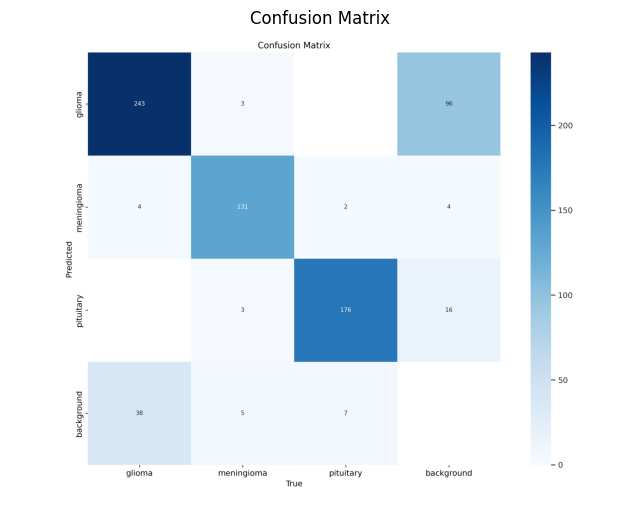

In [ ]:
# Load and display the confusion matrix
conf_matrix_path = "/content/runs/detect/val/confusion_matrix.png"
img = cv2.imread(conf_matrix_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

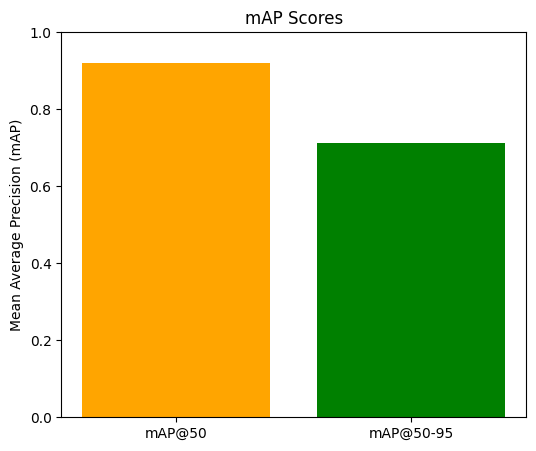

In [ ]:
# Plot mAP Curves Manually
# Extract values
mAP50 = metrics.results_dict["metrics/mAP50(B)"]
mAP50_95 = metrics.results_dict["metrics/mAP50-95(B)"]

# Plot
plt.figure(figsize=(6, 5))
plt.bar(["mAP@50", "mAP@50-95"], [mAP50, mAP50_95], color=["orange", "green"])
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores")
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1
plt.show()


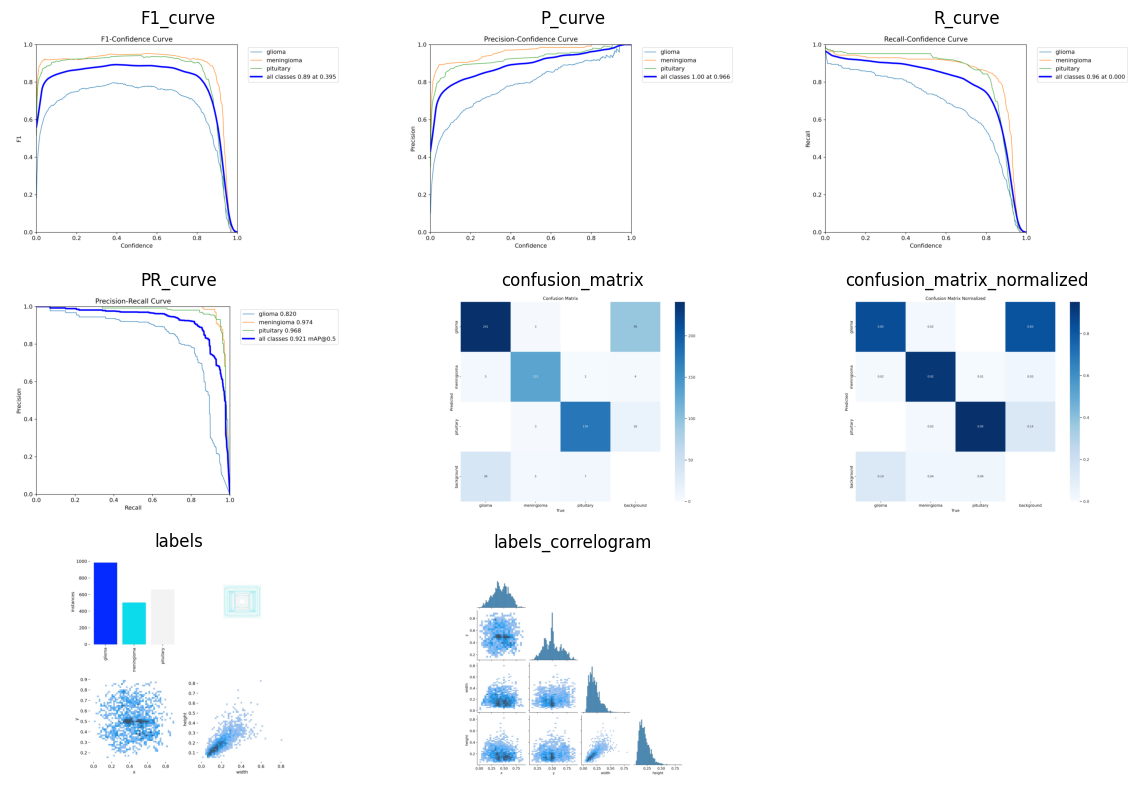

In [ ]:
def find_image_path(image_name, folders):
    """Finds the correct path for an image by checking multiple folders."""
    for folder in folders:
        img_path = os.path.join(folder, image_name)
        if os.path.exists(img_path):
            return img_path
    return None

def plot_images(image_files, folder_paths, rows=3, cols=3, figsize=(12, 8)):
    """Displays multiple images in a grid layout, checking multiple directories."""
    num_images = len(image_files)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten in case of multi-dimensional grid

    for i, img_name in enumerate(image_files):
        if i < len(axes):  # Avoid errors if there are more subplots than images
            img_path = find_image_path(img_name, folder_paths)  # Full paths

            if img_path is None:  # Check if the file exists
                print(f"❌ Error: File not found - {img_name}")
                axes[i].axis('off')  # Hide the subplot
                continue

            img = cv2.imread(img_path)
            if img is None:  # Check if the image was loaded correctly
                print(f"❌ Error: Unable to read image - {img_path}")
                axes[i].axis('off')  # Hide the subplot
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[i].imshow(img)
            axes[i].set_title(img_name.split('.')[0])  # Use filename as title
            axes[i].axis('off')
    # Remove any extra empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Define possible image locations
folder_paths = ["/content/runs/detect/train/", "/content/runs/detect/val/"]  # Path to the folder containing images

# List of images to display
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'labels.jpg',
    'labels_correlogram.jpg',
]

# Call the function with multiple folder paths
plot_images(image_files, folder_paths, rows=3, cols=3)


In [ ]:
%%time
# Run inference on the Test Set or Unseen data
test_results_1 = best_model.predict(source="/content/BrainTumor/BrainTumorYolov11/test/images/", save=True, conf=0.25)


image 1/308 /content/BrainTumor/BrainTumorYolov11/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 640x640 1 pituitary, 11.7ms
image 2/308 /content/BrainTumor/BrainTumorYolov11/test/images/1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg: 640x640 1 pituitary, 8.3ms
image 3/308 /content/BrainTumor/BrainTumorYolov11/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 8.1ms
image 4/308 /content/BrainTumor/BrainTumorYolov11/test/images/102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg: 640x640 1 meningioma, 8.3ms
image 5/308 /content/BrainTumor/BrainTumorYolov11/test/images/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg: 640x640 1 pituitary, 8.1ms
image 6/308 /content/BrainTumor/BrainTumorYolov11/test/images/1037_jpg.rf.7c415f051556bbba83bc00f70fe54818.jpg: 640x640 1 pituitary, 14.2ms
image 7/308 /content/BrainTumor/BrainTumorYolov11/test/images/1041_jpg.rf.252e75e8f025b79f801db895122613d3.jpg: 640x640 1 pituitary, 11.9ms
image 8/308 /content/Br

In [ ]:
# List to store extracted results
results = []

# Loop through YOLOv11 results
for result in test_results_1:
    image_name = result.path  # Get image path
    detections = result.names if result.boxes else "no detections"  # Check if detections exist

    # Append results as dictionary
    results.append({"Image": image_name.split("/")[-1], "Detection": detections})

# Convert to Pandas DataFrame
df = pd.DataFrame(results)

# Display results
df

Image  \
0    1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg   
1    1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg   
2    1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg   
3     102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg   
4    1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg   
..                                                ...   
303   937_jpg.rf.f1aeff71adf047fc3774da3706a9c18d.jpg   
304   940_jpg.rf.b20d2f1451241d70bbbc6f6599180f2e.jpg   
305   956_jpg.rf.98844fd6cb49702609e2f9414dc68649.jpg   
306   964_jpg.rf.7ce0bb422c279b80d38fbe1b4d46dabf.jpg   
307   979_jpg.rf.8fad468a4755ad718f4a8b8b6893535c.jpg   

                                          Detection  
0    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
1    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
2    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
3    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
4    {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
..                                              ...  
303  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
304  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
305  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
306  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  
307  {0: 'glioma', 1: 'meningioma', 2: 'pituitary'}  

[308 rows x 2 columns]

In [ ]:
%%time
# Evaluate the Model on the Test Set
test_metrics_1 = best_model.val(data="/content/BrainTumor/BrainTumorYolov11/data.yaml", split="test")


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/BrainTumor/BrainTumorYolov11/test/labels... 308 images, 0 backgrounds, 0 corrupt: 100%|██████████| 308/308 [00:00<00:00, 1681.33it/s]

val: New cache created: /content/BrainTumor/BrainTumorYolov11/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


                   all        308        308      0.873      0.885      0.913      0.685
                glioma        159        159      0.733      0.767      0.798      0.515
            meningioma         62         62      0.933      0.952      0.971      0.815
             pituitary         87         87      0.953      0.935      0.971      0.725
Speed: 1.4ms preprocess, 4.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2
CPU times: user 7.23 s, sys: 2.38 s, total: 9.61 s
Wall time: 7.5 s



0: 640x640 1 pituitary, 29.7ms
Speed: 3.4ms preprocess, 29.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 12.9ms
Speed: 2.9ms preprocess, 12.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 meningioma, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 glioma, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 6

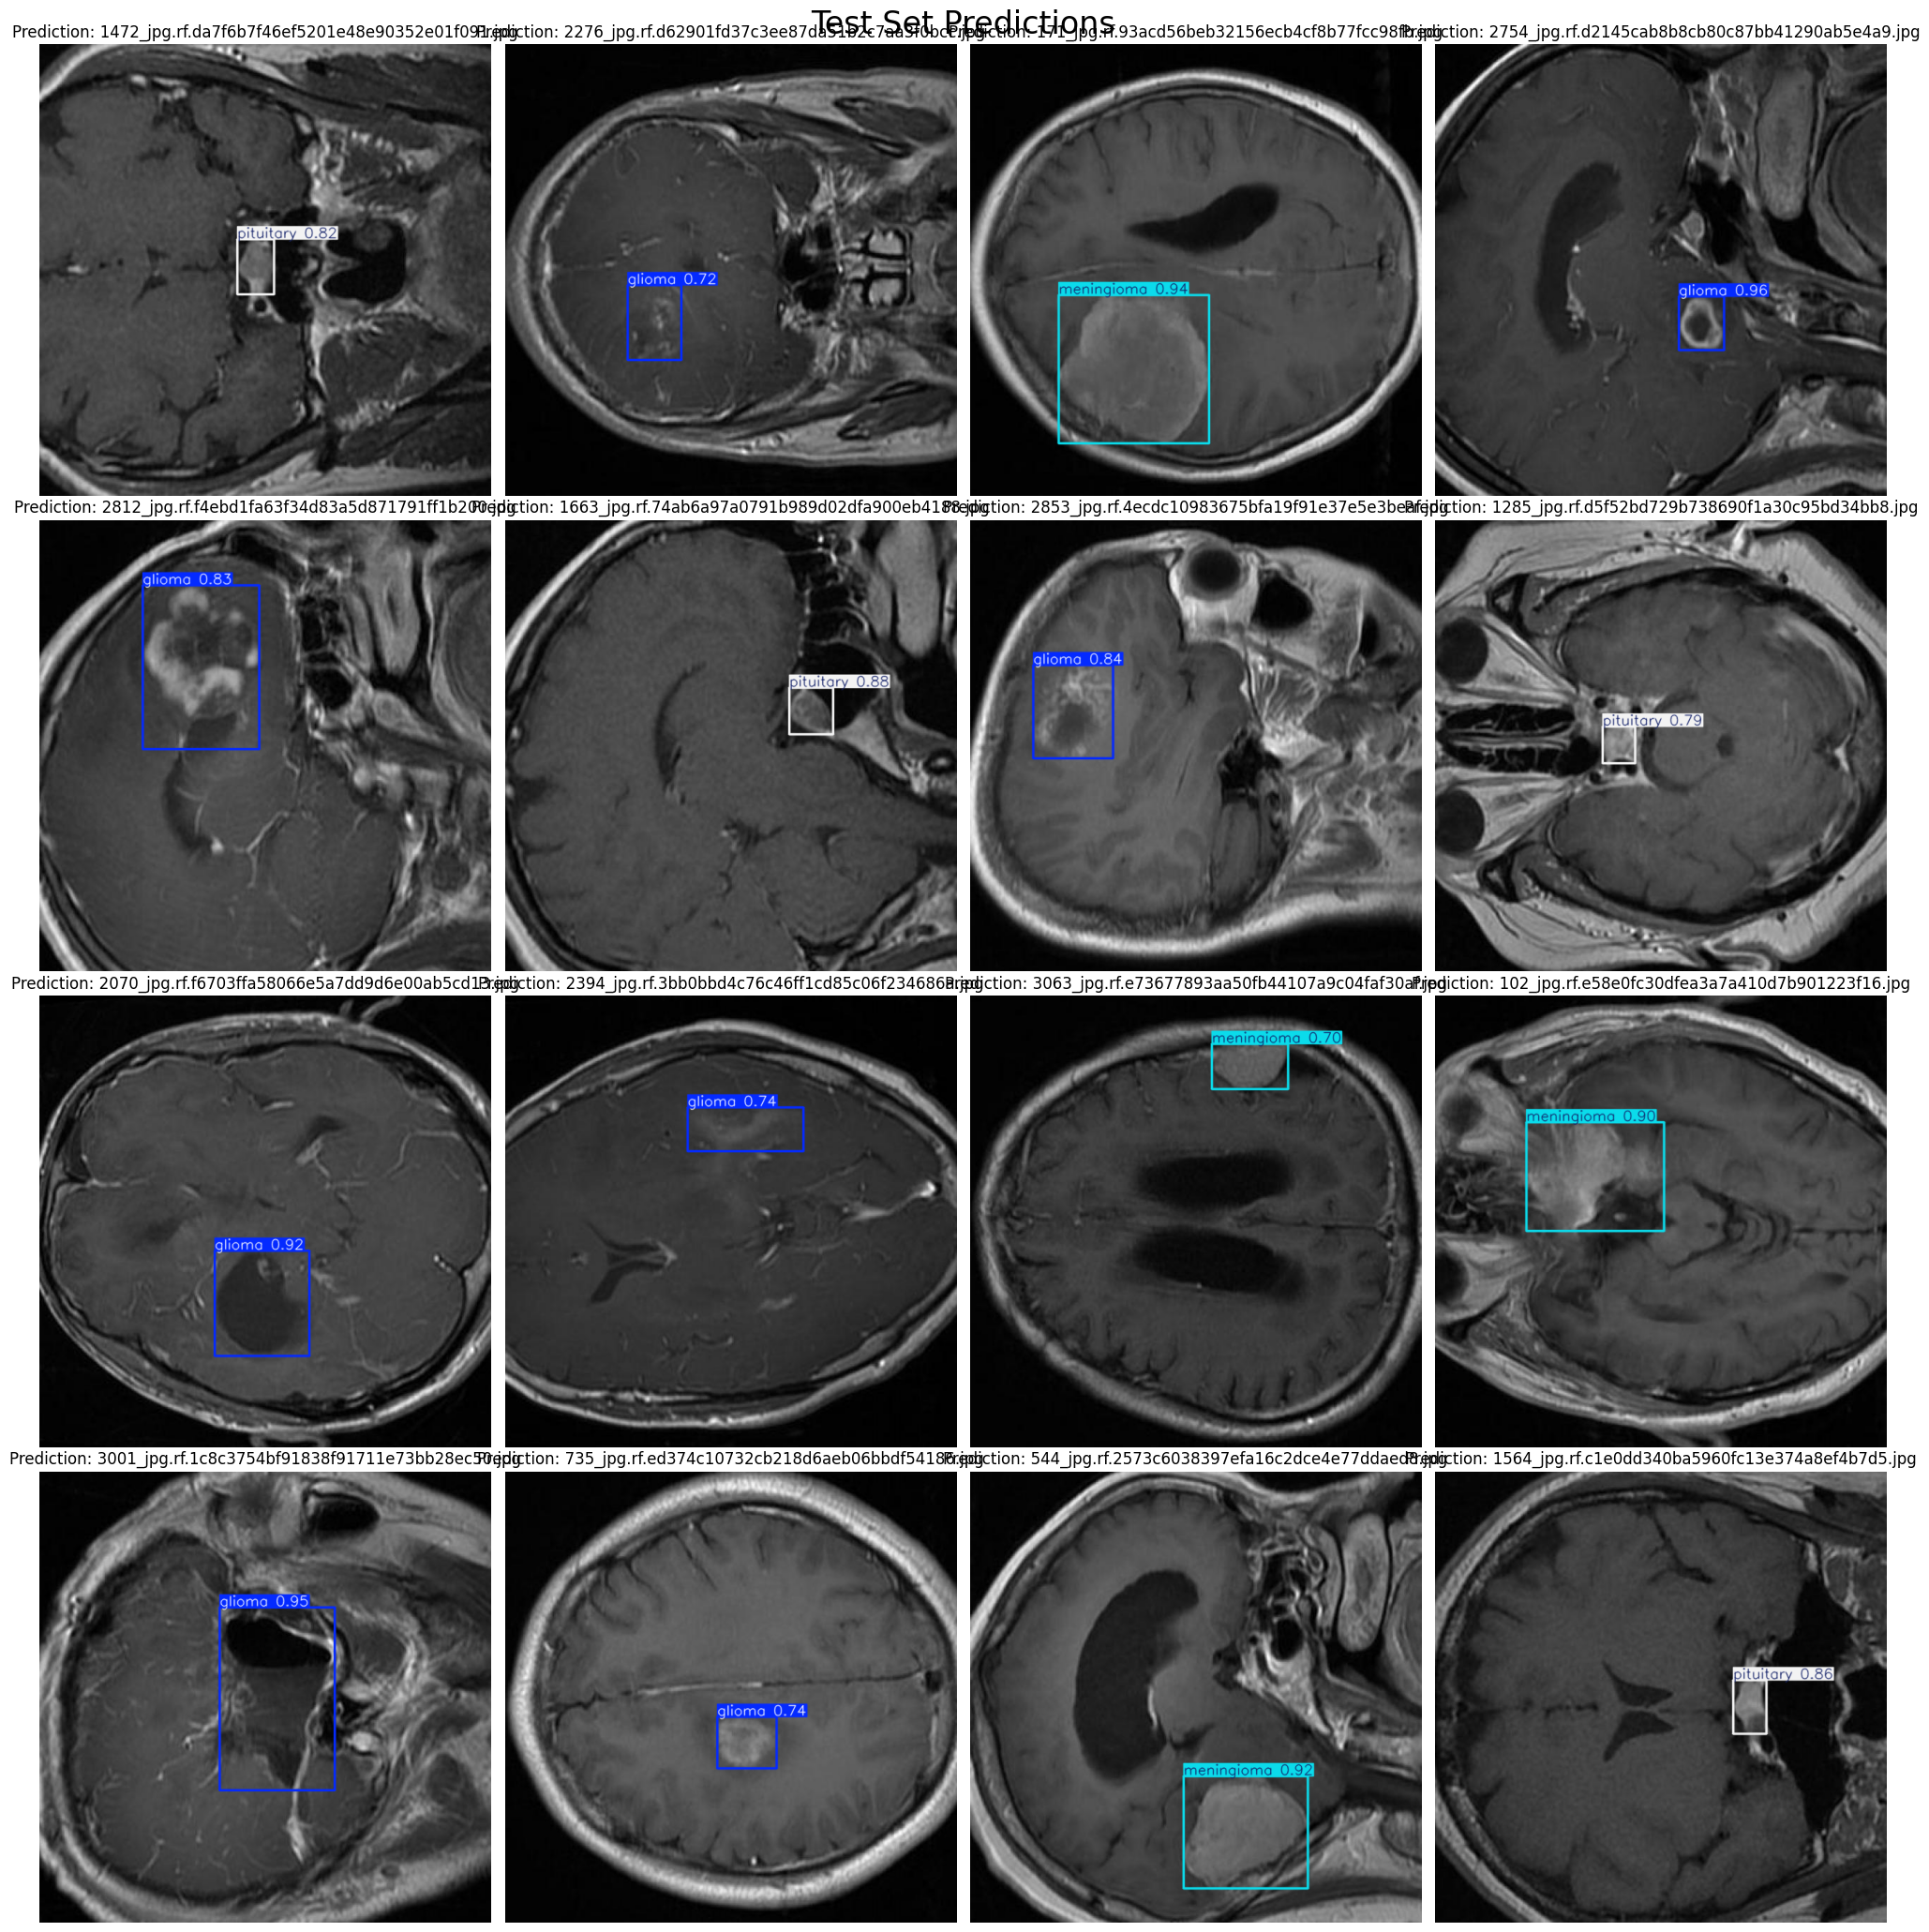

In [ ]:
# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)

# Path to test images
dataset_path = "/content/BrainTumor/BrainTumorYolov11"
test_images_path = os.path.join(dataset_path, "test", "images")

# List all test images
image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.png'))]

# Ensure there are images
if len(image_files) > 0:
    # Select up to 16 evenly spaced images for visualization
    num_images = min(len(image_files), 16)
    step_size = max(1, len(image_files) // num_images)
    selected_images = [image_files[i] for i in range(0, len(image_files), step_size)][:16]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle("Test Set Predictions", fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(test_images_path, selected_images[i])

            # Load and resize image
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is None:
                print(f"Warning: Failed to load {image_path}")
                continue

            resized_image = resize_image(image, size=(640, 640))

            # Run inference with YOLOv8
            results = best_model.predict(source=resized_image, imgsz=640, conf=0.5)

            # Annotate and display image
            annotated_image = results[0].plot(line_width=2)
            ax.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            ax.set_title(f"Prediction: {selected_images[i]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("No test images found!")

In [ ]:
# Define paths
source_path = "/content/runs/detect/train/weights/best.pt"
destination_path = "/content/BrainTumor/BrainTumorYolov11/best_model.pt"  # Change to your preferred location

# Copy the model
shutil.copy(source_path, destination_path)
print(f"Best model saved at: {destination_path}")


Best model saved at: /content/BrainTumor/BrainTumorYolov11/best_model.pt


In [ ]:
# Export as TorchScript
best_model.export(format="torchscript")

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 2.4s, saved as '/content/runs/detect/train/weights/best.torchscript' (10.4 MB)

Export complete (4.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.torchscript imgsz=640 data=/content/BrainTumor/BrainTumorYolov11/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.torchscript'

In [ ]:
# Export the ONNX model
best_model.export(format="onnx")

# Move the exported file to the desired directory
shutil.move("/content/runs/detect/train/weights/best.onnx", "/content/BrainTumor/BrainTumorYolov11/best.onnx")


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 215.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 234.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 181.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 194.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 219.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.2s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
O

'/content/BrainTumor/BrainTumorYolov11/best.onnx'